<a href="https://colab.research.google.com/github/asepmuhidin/pbo_upb/blob/main/EDA_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Superstore
### Created by Asep Muhidin, November 2024

In [3]:
#Akses dataset dari Googledrive
from google.colab import drive

drive.mount('mnt')

Mounted at mnt


In [7]:
#Cek folder dataset
!ls mnt/MyDrive/ML/dataset

bodyfat.csv		    HepatitisCdata.csv	      wind_dataset.csv
Content_based_recommenders  Iklan_sosmed.csv	      winequality-red.csv
hcvdat0.csv		    ml-25m		      wki_purchasing.csv
heart.csv		    price.csv		      wki_purchasing_non_supp_column.xlsx
heart_disease_uci.csv	    purchasing_wki2013up.csv  wki_purchasing.xlsx
heart_failure.csv	    sqllogdump.csv
HepatitisC.csv		    superstore.csv


In [9]:
#set Path
path="mnt/MyDrive/ML"
fdataset="superstore.csv"

In [47]:
##Import Paket
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [11]:
#Load dataset
df=pd.read_csv(f"{path}/dataset/{fdataset}")
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [17]:
#Tampilkan nama negara
df.Country.value_counts().index

Index(['United States', 'Australia', 'France', 'Mexico', 'Germany', 'China',
       'United Kingdom', 'Brazil', 'India', 'Indonesia',
       ...
       'Tajikistan', 'Equatorial Guinea', 'Slovenia', 'Armenia', 'Burundi',
       'South Sudan', 'Chad', 'Swaziland', 'Eritrea', 'Bahrain'],
      dtype='object', name='Country', length=147)

In [20]:
#Cek apakah ada data penjualan dari negara indonesia
df_indo=df[df.Country=="Indonesia"]
df_indo.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
30452,Furniture,Depok,Indonesia,HK-148901,Heather Kirkland,0.27,APAC,1,2011-01-26 00:00:00.000,ID-2011-36011,...,334,Corporate,2011-01-27 00:00:00.000,First Class,92.67,Jawa Barat,Chairs,2011,APAC,5
30453,Technology,Jakarta,Indonesia,MD-178601,Michael Dominguez,0.17,APAC,1,2011-02-26 00:00:00.000,ID-2011-25735,...,287,Corporate,2011-03-01 00:00:00.000,Second Class,81.63,Jakarta,Machines,2011,APAC,9
30454,Furniture,Bekasi,Indonesia,MZ-175151,Mary Zewe,0.27,APAC,1,2011-03-02 00:00:00.000,ID-2011-34037,...,682,Corporate,2011-03-02 00:00:00.000,Same Day,48.69,Jawa Barat,Chairs,2011,APAC,10
30455,Technology,Bekasi,Indonesia,MZ-175151,Mary Zewe,0.07,APAC,1,2011-03-02 00:00:00.000,ID-2011-34037,...,1055,Corporate,2011-03-02 00:00:00.000,Same Day,27.16,Jawa Barat,Copiers,2011,APAC,10
30456,Technology,Jakarta,Indonesia,TS-215051,Tony Sayre,0.07,APAC,1,2011-03-23 00:00:00.000,IN-2011-34191,...,137,Consumer,2011-03-26 00:00:00.000,First Class,22.55,Jakarta,Copiers,2011,APAC,13


In [22]:
#Tampilkan statistika deskriftif
df_indo.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,1390.000000,1390.0,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,0.297309,1.0,11.229265,3.767626,25394.479137,291.285612,31.617715,2012.800719,31.051799
std,0.149574,0.0,135.464540,2.210314,2881.885954,515.335905,65.770683,1.094459,14.181439
min,0.070000,1.0,-916.044300,1.000000,20312.000000,3.000000,0.140000,2011.000000,1.000000
25%,0.170000,1.0,-18.605025,2.000000,22806.250000,36.000000,3.072500,2012.000000,21.000000
50%,0.270000,1.0,-3.511500,3.000000,25385.500000,93.000000,8.390000,2013.000000,32.000000
75%,0.470000,1.0,17.637450,5.000000,27841.000000,312.500000,29.212500,2014.000000,44.000000
max,0.470000,1.0,1554.432000,14.000000,31296.000000,4242.000000,660.870000,2014.000000,53.000000


```
Analisis Deskriptif Penjualan Produk
• Tujuan: Melakukan analisis deskriptif pada data penjualan suatu produk.
• Deskripsi Proyek:
o Dataset yang berisi data penjualan selama 6 bulan.
o Variabel meliputi: ID transaksi, kategori produk, jumlah terjual, harga satuan,
total penjualan.
o Mahasiswa diminta menghitung rata-rata, median, modus, standar deviasi, dan
rentang penjualan.
o Visualisasi data dengan Histogram dan Boxplot.
o Interpretasi hasil berdasarkan statistik deskriptif dan grafik.
```


In [24]:
#Cek kolom/field
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1390 entries, 30452 to 42232
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        1390 non-null   object 
 1   City            1390 non-null   object 
 2   Country         1390 non-null   object 
 3   Customer.ID     1390 non-null   object 
 4   Customer.Name   1390 non-null   object 
 5   Discount        1390 non-null   float64
 6   Market          1390 non-null   object 
 7   记录数             1390 non-null   int64  
 8   Order.Date      1390 non-null   object 
 9   Order.ID        1390 non-null   object 
 10  Order.Priority  1390 non-null   object 
 11  Product.ID      1390 non-null   object 
 12  Product.Name    1390 non-null   object 
 13  Profit          1390 non-null   float64
 14  Quantity        1390 non-null   int64  
 15  Region          1390 non-null   object 
 16  Row.ID          1390 non-null   int64  
 17  Sales           1390 non-null   i

In [35]:
#Variabel meliputi: ID transaksi, kategori produk, jumlah terjual, harga satuan,total penjualan.
columns=['Order.ID','Order.Date', 'Category','Quantity','Sales']
df_indo_col=df_indo[columns]
df_indo_col.head()

,Order.ID,Order.Date,Category,Quantity,Sales
30452,ID-2011-36011,2011-01-26 00:00:00.000,Furniture,1,334
30453,ID-2011-25735,2011-02-26 00:00:00.000,Technology,3,287
30454,ID-2011-34037,2011-03-02 00:00:00.000,Furniture,2,682
30455,ID-2011-34037,2011-03-02 00:00:00.000,Technology,3,1055
30456,IN-2011-34191,2011-03-23 00:00:00.000,Technology,1,137


In [36]:
#Column sales adalah data total penjualan, harga satuan bisa dicari dengan menghitung data sales dibagi quantity,
df_indo_col['price']=df_indo_col.apply(lambda x:x['Sales']/x['Quantity'], axis=1).copy()
df_indo_col.head()

<ipython-input-36-d0f8106e67a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indo_col['price']=df_indo_col.apply(lambda x:x['Sales']/x['Quantity'], axis=1).copy()


,Order.ID,Order.Date,Category,Quantity,Sales,price
30452,ID-2011-36011,2011-01-26 00:00:00.000,Furniture,1,334,334.000000
30453,ID-2011-25735,2011-02-26 00:00:00.000,Technology,3,287,95.666667
30454,ID-2011-34037,2011-03-02 00:00:00.000,Furniture,2,682,341.000000
30455,ID-2011-34037,2011-03-02 00:00:00.000,Technology,3,1055,351.666667
30456,IN-2011-34191,2011-03-23 00:00:00.000,Technology,1,137,137.000000


In [ ]:
# Dataset yang berisi data penjualan selama 6 bulan.
# Solusi : Urutkan berdasarkan Order Date


In [41]:
df_indo_col.sort_values('Order.Date',ascending=False)

,Order.ID,Order.Date,Category,Quantity,Sales,price
30661,IN-2014-43550,2014-12-31 00:00:00.000,Furniture,3,1091,363.666667
38721,IN-2014-78228,2014-12-31 00:00:00.000,Technology,4,294,73.500000
34335,IN-2014-49206,2014-12-30 00:00:00.000,Office Supplies,9,457,50.777778
42009,ID-2014-48828,2014-12-29 00:00:00.000,Office Supplies,2,21,10.500000
42010,ID-2014-48828,2014-12-29 00:00:00.000,Office Supplies,5,33,6.600000
...,...,...,...,...,...,...
41950,IN-2011-39308,2011-01-11 00:00:00.000,Office Supplies,9,334,37.111111
41949,IN-2011-39308,2011-01-11 00:00:00.000,Furniture,5,188,37.600000
35962,ID-2011-20814,2011-01-09 00:00:00.000,Technology,2,240,120.000000
37020,IN-2011-29963,2011-01-06 00:00:00.000,Office Supplies,7,41,5.857143


In [43]:
#Data terakhir tgl 31-12-2014. Ambil data dari bulan 6 sd 12 tahun 2014
#Convert kolom Order.Date ke datetime
df_indo_col['Order.Date'] = pd.to_datetime(df_indo_col['Order.Date'])

df_indo_filtered = df_indo_col[(df_indo_col['Order.Date'].dt.year == 2014) &
                          (df_indo_col['Order.Date'].dt.month >= 6)].copy()
df_indo_filtered.head()

<ipython-input-43-ab76e1e5c57d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indo_col['Order.Date'] = pd.to_datetime(df_indo_col['Order.Date'])


,Order.ID,Order.Date,Category,Quantity,Sales,price
30607,IN-2014-72516,2014-06-02,Furniture,2,816,408.0
30608,IN-2014-72516,2014-06-02,Technology,8,1044,130.5
30609,ID-2014-13604,2014-06-07,Technology,2,110,55.0
30610,ID-2014-79957,2014-06-10,Furniture,1,170,170.0
30611,ID-2014-18147,2014-06-11,Technology,2,90,45.0


In [44]:
#Mahasiswa diminta menghitung rata-rata, median, modus, standar deviasi, dan rentang penjualan.
df_indo_filtered.describe()

,Order.Date,Quantity,Sales,price
count,376,376.000000,376.000000,376.000000
mean,2014-09-28 09:11:29.361702144,3.872340,300.960106,75.487521
min,2014-06-02 00:00:00,1.000000,4.000000,2.666667
25%,2014-08-04 00:00:00,2.000000,30.750000,10.305556
50%,2014-10-16 12:00:00,3.000000,88.000000,22.000000
75%,2014-11-27 06:00:00,5.000000,319.750000,107.333333
max,2014-12-31 00:00:00,14.000000,3696.000000,543.000000
std,NaN,2.276765,556.108758,108.479535


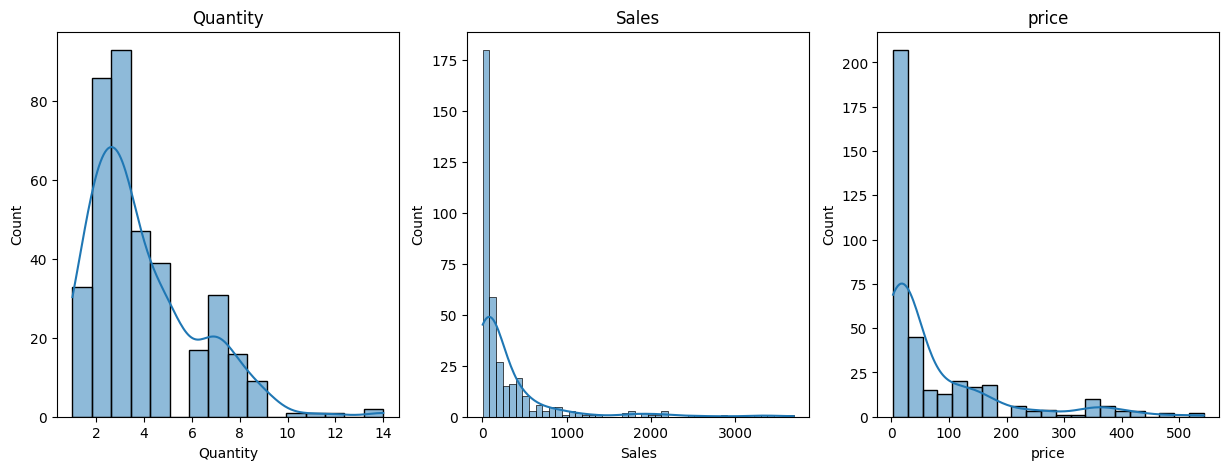

In [58]:
#Visualisasi data dengan Histogram dan Boxplot.
cols=['Quantity','Sales','price']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


for col,ax in zip(cols,axs.flatten()):
  ax.set_title(col)
  sn.histplot(df_indo_filtered, x=col,ax=ax, kde=True)

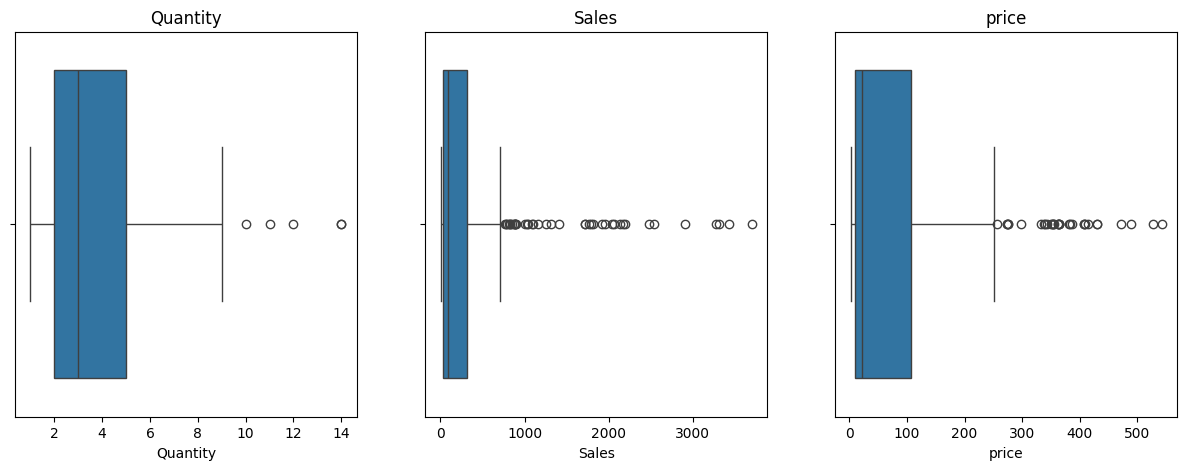

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for col,ax in zip(cols,axs.flatten()):
  ax.set_title(col)
  sn.boxplot(df_indo_filtered, x=col,ax=ax)